In [1]:
# If notebook give any error then you can try following one by one.

# !pip install scikit-learn
# !pip install opencv-python-headless
# !pip install opencv-python
# import site
# site.getsitepackages()
#pip install wheel-name.whl
#!pip install --upgrade pip
#-----or-----
# import sys
# sys.path.append('<extra paths found in terminal but not in Jupyter, separated by commas>')
#-----or-----
# !apt-get update && apt-get install -y python3-opencv
# !pip install opencv-python
# !pip install scikit-learn

<a id ="Importing_Required_Library"> </a>
# 5. Importing Required Library

In [2]:
#Importing required library
import os
import h5py    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Activation
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score, recall_score, f1_score, precision_recall_curve, auc

import cv2
from PIL import Image

<a id ="Dataset_Import_Visualization_and_Preprocessing"> </a>
# 7. Dataset Import, Visualization and Preprocessing

In [3]:
filepath="/kaggle/input/street-view-housing-number-digit-recognition/SVHN_single_grey1.h5"
df= h5py.File(filepath,'r') #read hd5 file
dataframe=np.array(df)
ls=list(dataframe)
print("List of datasets in this file: \n",ls)
  
X_test = np.array(df['X_test'])
X_train = np.array(df['X_train'])
X_val = np.array(df['X_val'])

y_test = np.array(df['y_test'])
y_train = np.array(df['y_train'])
y_val = np.array(df['y_val'])
print("Shape of X_train: \n",X_train.shape)
print("Shape of y_train: \n",y_train.shape)
print("Shape of X_test: \n",X_test.shape)
print("Shape of y_test: \n",y_test.shape)
print("Shape of X_val: \n",X_val.shape)
print("Shape of y_val: \n",y_val.shape) 

List of datasets in this file: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Shape of X_train: 
 (42000, 32, 32)
Shape of y_train: 
 (42000,)
Shape of X_test: 
 (18000, 32, 32)
Shape of y_test: 
 (18000,)
Shape of X_val: 
 (60000, 32, 32)
Shape of y_val: 
 (60000,)


### Data Defination:
* X_train Data volume= 42000 and size= 32x32 pixel
* X_test Data volume= 18000 and size= 32x32 pixel
* X_val Data volume= 60000 and size= 32x32 pixel


## 7.1 Data Visualization

#### Plotting Distribution of Data

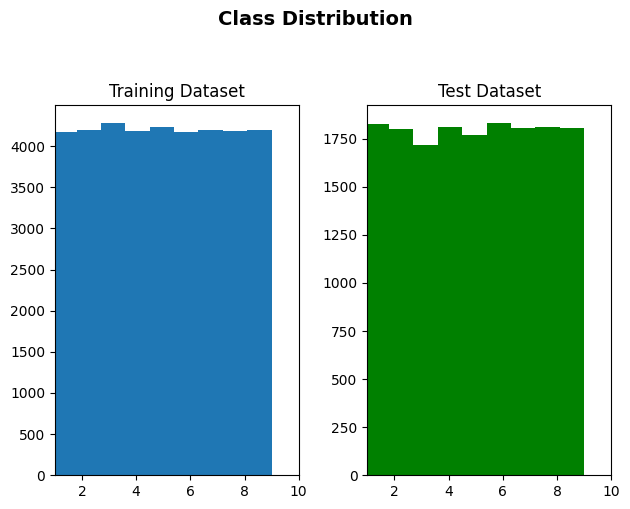

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test Dataset")

fig.tight_layout()

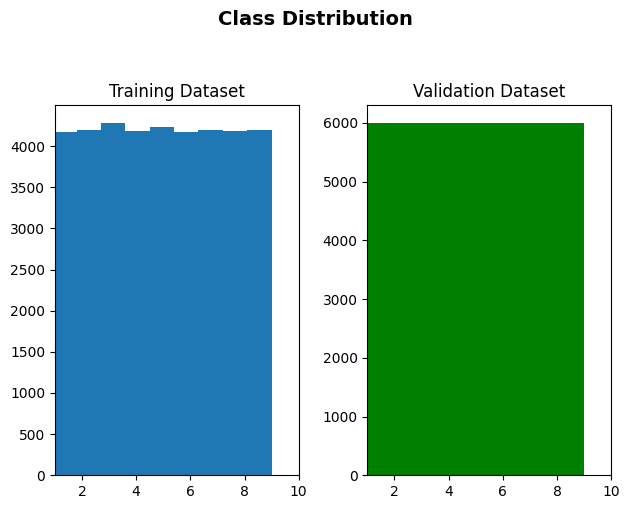

In [5]:

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation Dataset")

fig.tight_layout()

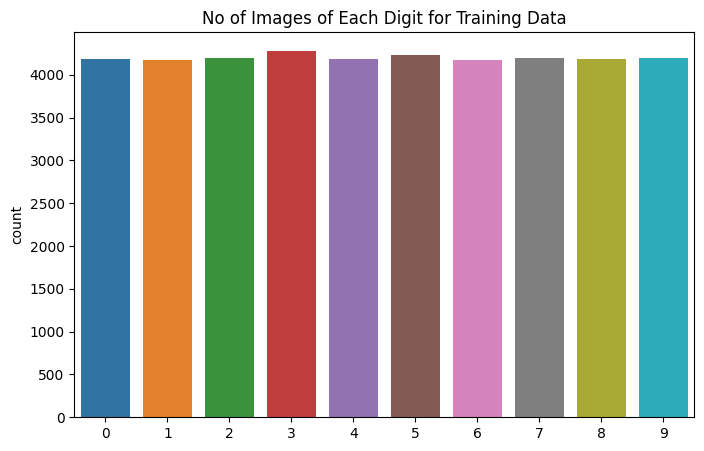

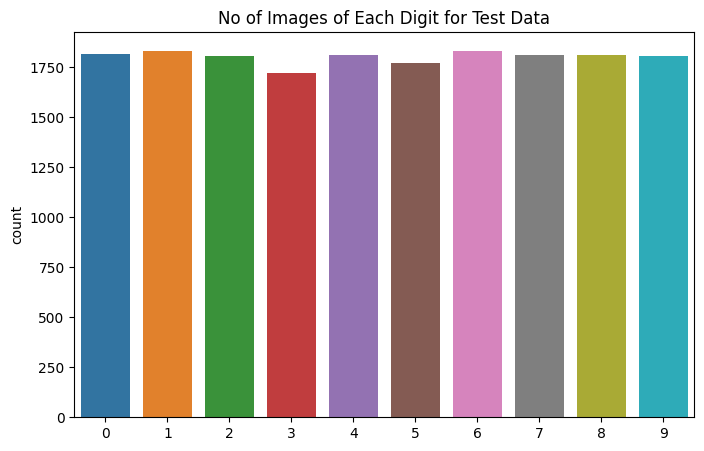

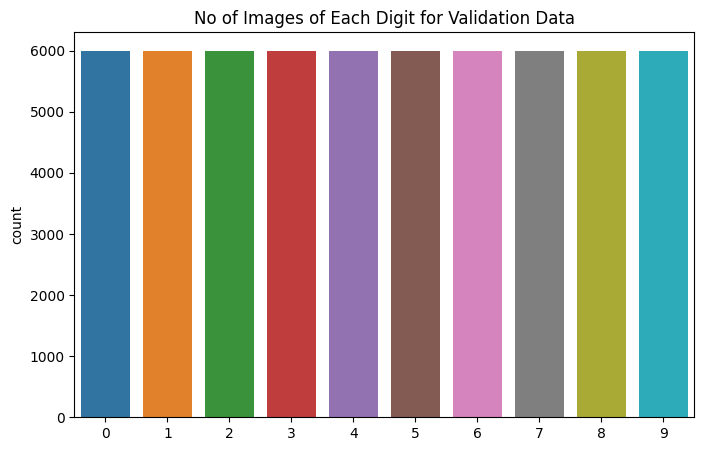

In [6]:
ax1 = plt.subplots(figsize=(8,5))
ax1 = sns.countplot(x=y_train)

ax1.set_title("No of Images of Each Digit for Training Data")

ax2 = plt.subplots(figsize=(8,5))
ax2 = sns.countplot(x=y_test)

ax2.set_title("No of Images of Each Digit for Test Data")

ax3 = plt.subplots(figsize=(8,5))
ax3 = sns.countplot(x=y_val)

ax3.set_title("No of Images of Each Digit for Validation Data")
plt.show()

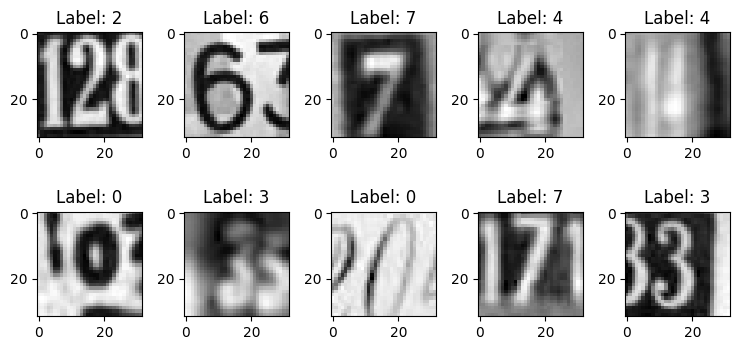

In [7]:
num_row = 2
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row)) 
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout() 
    
plt.show()

In [8]:
X_train.shape

(42000, 32, 32)

In [9]:
y_train.shape

(42000,)

In [10]:
y_train[1]

6

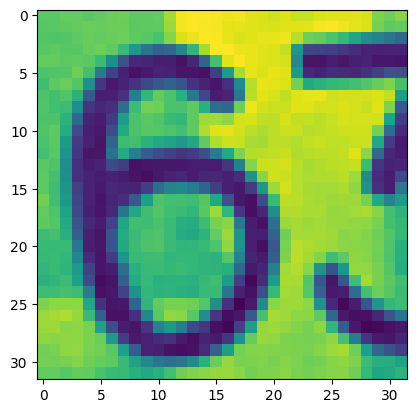

In [11]:
plt.imshow(X_train[1])

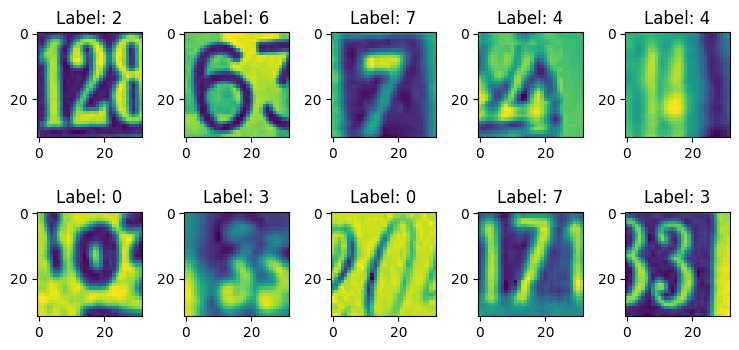

In [12]:
num_row = 2
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row)) 
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i])
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout() 
    
plt.show()

In [13]:
y_train.shape

(42000,)

In [14]:
# Display the training and predicted data
def plot_images(img,labels,nrows,ncols,pred_labels=None):
    fig = plt.figure(figsize = (25,10));
    axes = fig.subplots(nrows,ncols)
    for i, ax in enumerate(axes.flat):
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        if pred_labels is None:
            ax.set_title('True: %d' % labels[i])
        else:
            ax.set_title('True: {0}, Pred: {1}'.format(labels[i], np.argmax(pred_labels[i])))


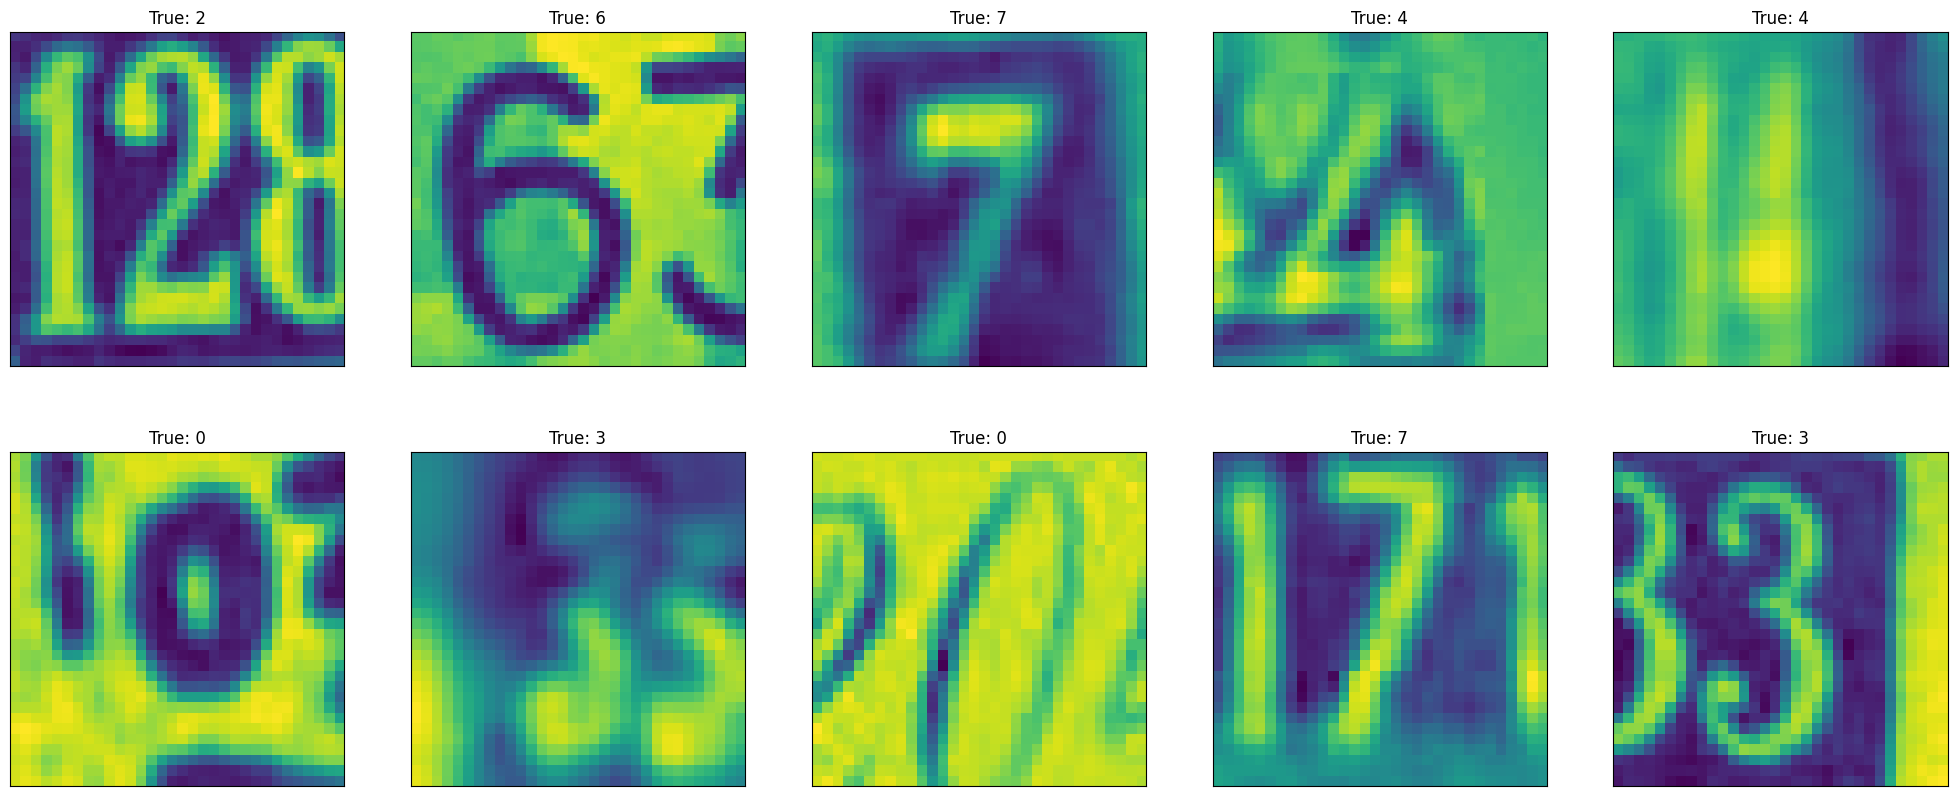

In [15]:
plot_images(X_train, y_train, 2, 5)

## 7.2 Data Preprocessing

### Normalization 

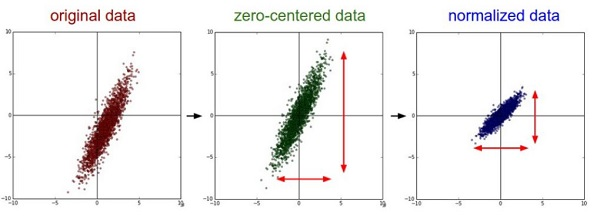

In [16]:
import numpy as np
x_train = np.expand_dims(X_train, axis=-1) # <--- add channel axis
x_train = x_train.astype('float32') / 255
x_val = np.expand_dims(X_val, axis=-1) # <--- add channel axis
x_val = x_val.astype('float32') /255
x_test = np.expand_dims(X_test, axis=-1) # <--- add channel axis
x_test = x_test.astype('float32') /255
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)

Shape of x_train: (42000, 32, 32, 1)
Shape of x_val: (60000, 32, 32, 1)
Shape of x_test: (18000, 32, 32, 1)


### Converting labels to categorical data

In [17]:
y_train=keras.utils.to_categorical(y_train)
y_val=keras.utils.to_categorical(y_val)
y_test=keras.utils.to_categorical(y_test)

print("Shape of ytrain:",y_train.shape)
print("Shape of yval:",y_val.shape)
print("Shape of ytest:",y_test.shape)

Shape of ytrain: (42000, 10)
Shape of yval: (60000, 10)
Shape of ytest: (18000, 10)


In [18]:
print(np.unique(X_train))

[0.000000e+00 1.140000e-01 2.280000e-01 ... 2.547465e+02 2.548605e+02
 2.549745e+02]


In [19]:
np.unique(y_train)

array([0., 1.])

In [20]:
X_train.shape

(42000, 32, 32)

In [21]:
x_train.shape

(42000, 32, 32, 1)

<a id ="Create_CNN_Model"> </a>
# 8. Create CNN Model, Validation and Accuracy vs los Visualization

## 8.1. Primary Model

In [22]:
num_classes = 10      # Number of classes to model

# Define the model
primary_model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 1)),  
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    
    Dense(512),
    Activation('relu'),
    Dropout(0.3),
    
    Dense(128),
    Activation('relu'),
    Dropout(0.1),
    
    Dense(num_classes, activation='softmax')])

primary_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [23]:
primary_model_history = primary_model.fit(x=x_train, y=y_train,
                                          validation_data=(x_val, y_val),
                                          batch_size=32,
                                          epochs=20,
                                          verbose=1)
                   

Epoch 1/20


I0000 00:00:1727958980.947078      80 service.cc:145] XLA service 0x7c185c004830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727958980.947135      80 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  62/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1000 - loss: 2.3046

I0000 00:00:1727958986.160040      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.2566 - loss: 1.9462 - val_accuracy: 0.7538 - val_loss: 0.7558
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7715 - loss: 0.7024 - val_accuracy: 0.8353 - val_loss: 0.5210
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8306 - loss: 0.5407 - val_accuracy: 0.8639 - val_loss: 0.4335
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8530 - loss: 0.4720 - val_accuracy: 0.8624 - val_loss: 0.4351
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8671 - loss: 0.4222 - val_accuracy: 0.8794 - val_loss: 0.3831
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8749 - loss: 0.3969 - val_accuracy: 0.8822 - val_loss: 0.3682
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8824 - loss: 0.3792 - val_accuracy: 0.8862 - val_loss: 0.3673
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8916 - loss: 0.3521 - val_accura

## 8.2. Accuracy and Loss Visualization for 1st model

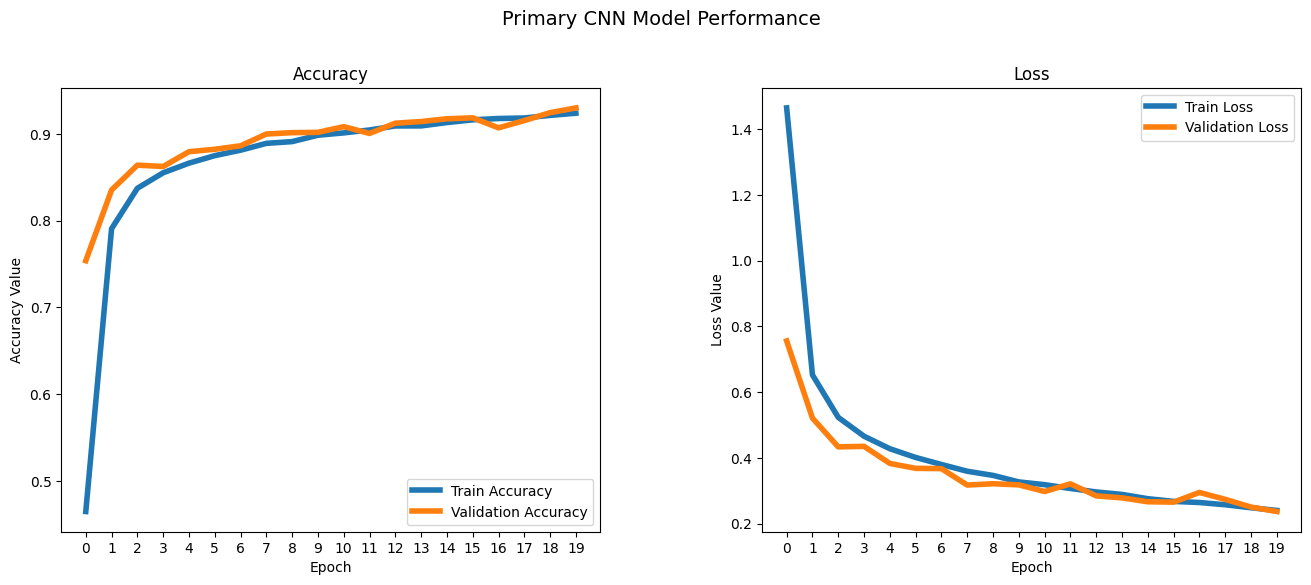

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('Primary CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, primary_model_history.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, primary_model_history.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, primary_model_history.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, primary_model_history.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## 8.3. Model Test, number Prediction and accuracy visualization

In [25]:
primary_model_scores = primary_model.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (primary_model.metrics_names[1], primary_model_scores[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8968 - loss: 0.3602
TEST SET: compile_metrics: 89.21%


In [26]:
test_predictions = primary_model.predict(x_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


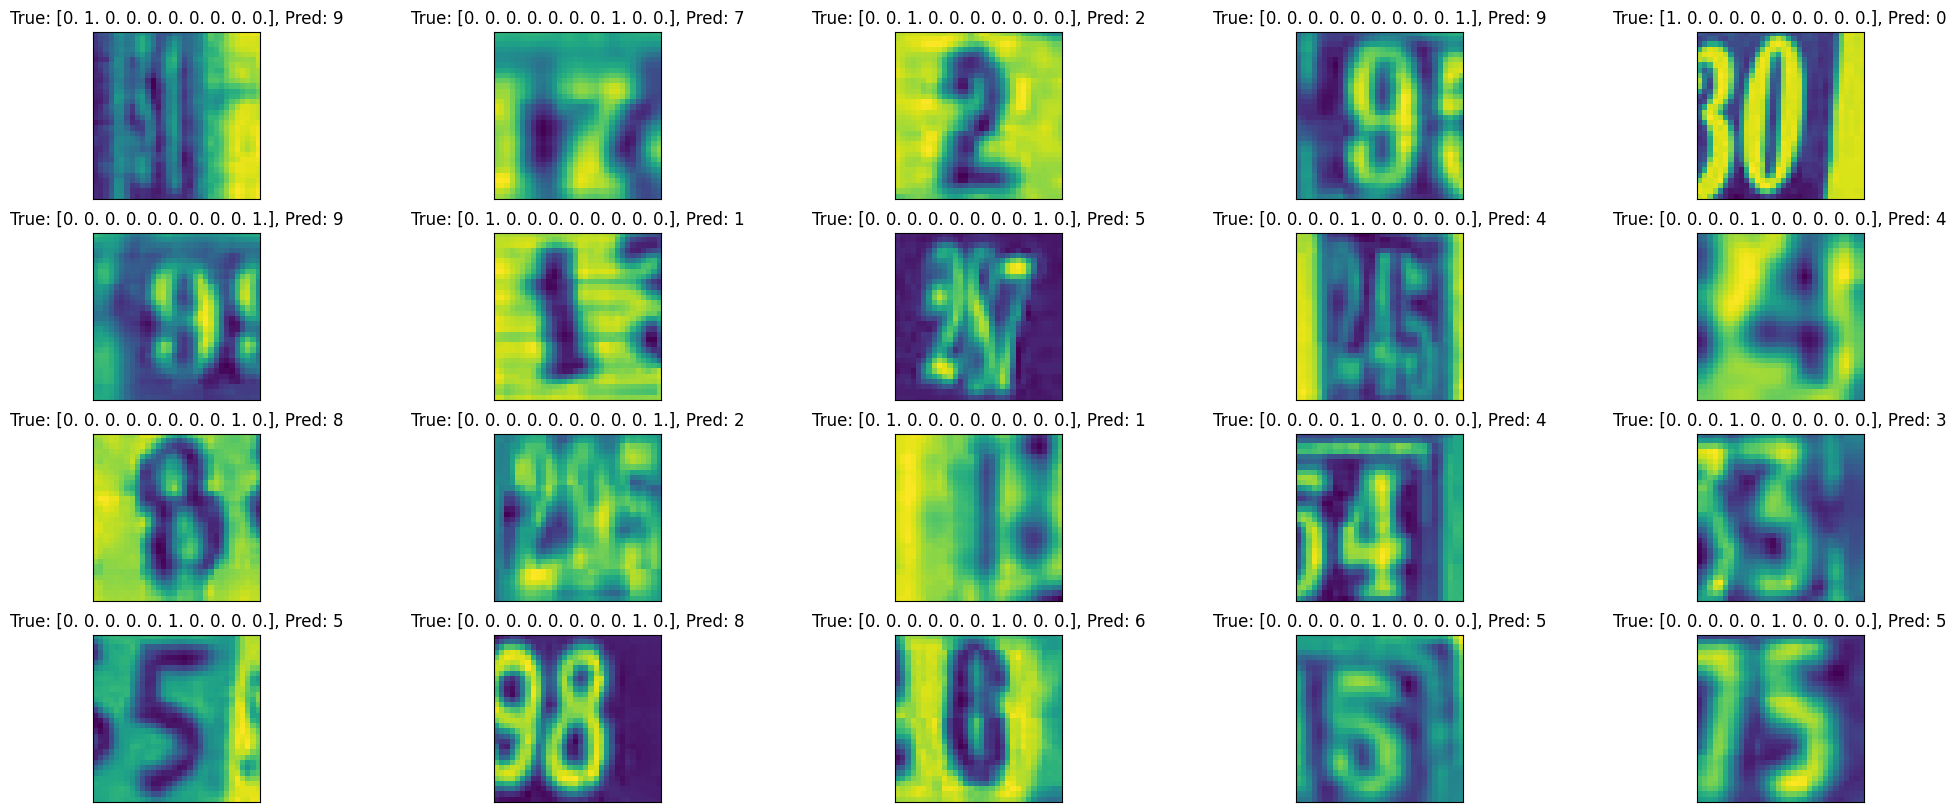

In [27]:
plot_images(x_test, y_test, 4, 5, test_predictions)

## 8.4. 2nd Model Using Batch Normalization

In [28]:
# Define the model
model1 = Sequential()

# Add convolutional layers
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))

# Add Flatten layers
model1.add(Flatten())
model1.add(Dropout(0.3))

# Add dense layers
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer

# Add dense layers
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer
model1.add(Dropout(0.2))

# Add the output layer
model1.add(Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,274 (215.91 KB)

 Trainable params: 54,698 (213.66 KB)

 Non-trainable params: 576 (2.25 KB)

In [30]:
history1 = model1.fit(x=x_train, y=y_train,
                   validation_data=(x_val, y_val),
                   batch_size=32,
                   epochs=20,
                   verbose=1)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4312 - loss: 1.7441 - val_accuracy: 0.7935 - val_loss: 0.6468
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7941 - loss: 0.6596 - val_accuracy: 0.8270 - val_loss: 0.5445
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8319 - loss: 0.5423 - val_accuracy: 0.8171 - val_loss: 0.5716
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8534 - loss: 0.4720 - val_accuracy: 0.8843 - val_loss: 0.3784
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8624 - loss: 0.4499 - val_accuracy: 0.9061 - val_loss: 0.3144
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8741 - loss: 0.4070 - val_accuracy: 0.9081 - val_loss: 0.3093
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8794 - loss: 0.3934 - val_accuracy: 0.9104 - val_loss: 0.2922
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8852 - loss: 0.3760 -

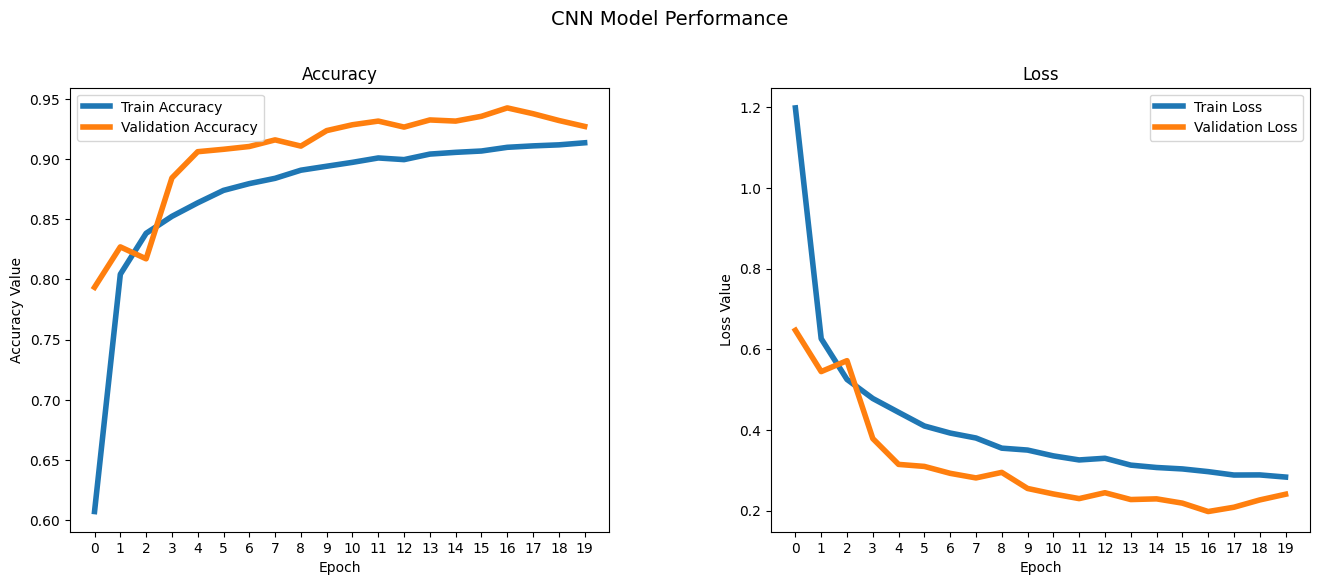

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history1.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, history1.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history1.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, history1.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [32]:
model1_scores = model1.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (model1.metrics_names[1], model1_scores[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9104 - loss: 0.2894
TEST SET: compile_metrics: 90.59%


In [33]:
test_predictions1 = model1.predict(x_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


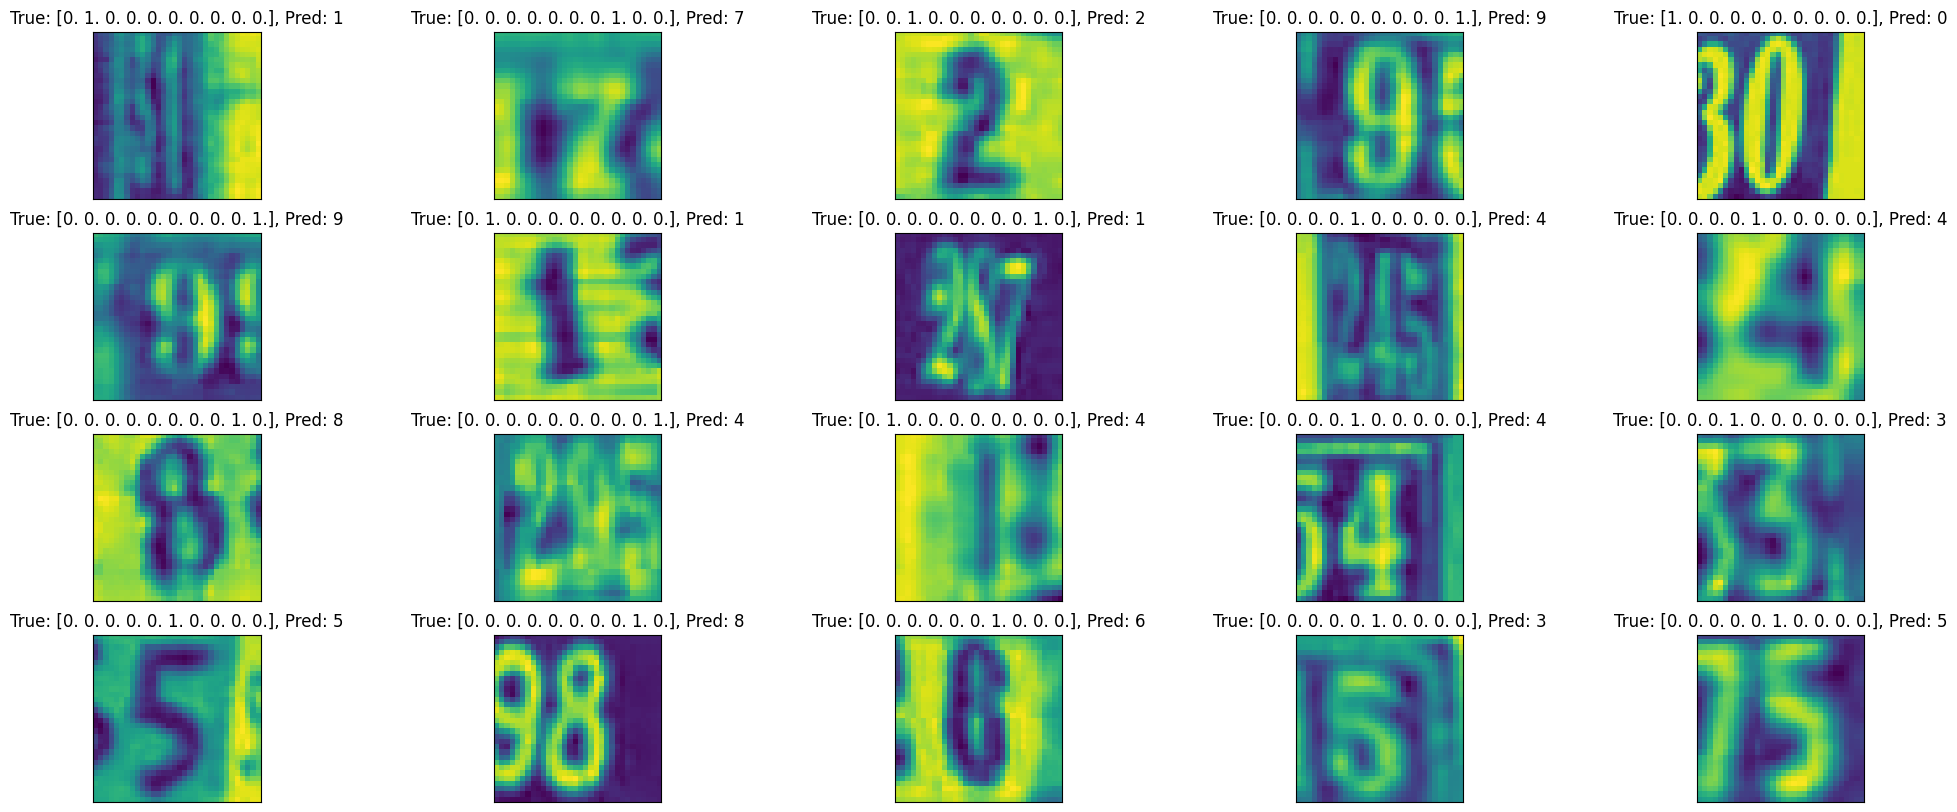

In [34]:
plot_images(x_test, y_test, 4, 5, test_predictions1)

## 8.5. 3rd Model After Increase Conv Layer

In [35]:
keras.backend.clear_session()

model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3),activation='relu', input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (3, 3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    
    keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),    
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(10 ,  activation='softmax')
])
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,818 (1.69 MB)

 Trainable params: 443,370 (1.69 MB)

 Non-trainable params: 448 (1.75 KB)

In [36]:
model2.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [37]:
history2 = model2.fit(x=x_train, y=y_train,
                   validation_data=(x_val, y_val),
                   batch_size=32,
                   epochs=20,
                   verbose=1)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.2050 - loss: 2.1410 - val_accuracy: 0.8311 - val_loss: 0.5738
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8188 - loss: 0.6103 - val_accuracy: 0.8927 - val_loss: 0.3733
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8868 - loss: 0.4023 - val_accuracy: 0.9043 - val_loss: 0.3554
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9045 - loss: 0.3322 - val_accuracy: 0.9146 - val_loss: 0.3113
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9121 - loss: 0.3049 - val_accuracy: 0.9360 - val_loss: 0.2377
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9263 - loss: 0.2675 - val_accuracy: 0.9204 - val_loss: 0.2846
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9296 - loss: 0.2536 - val_accuracy: 0.9454 - val_loss: 0.1972
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9354 - loss: 0.2287 

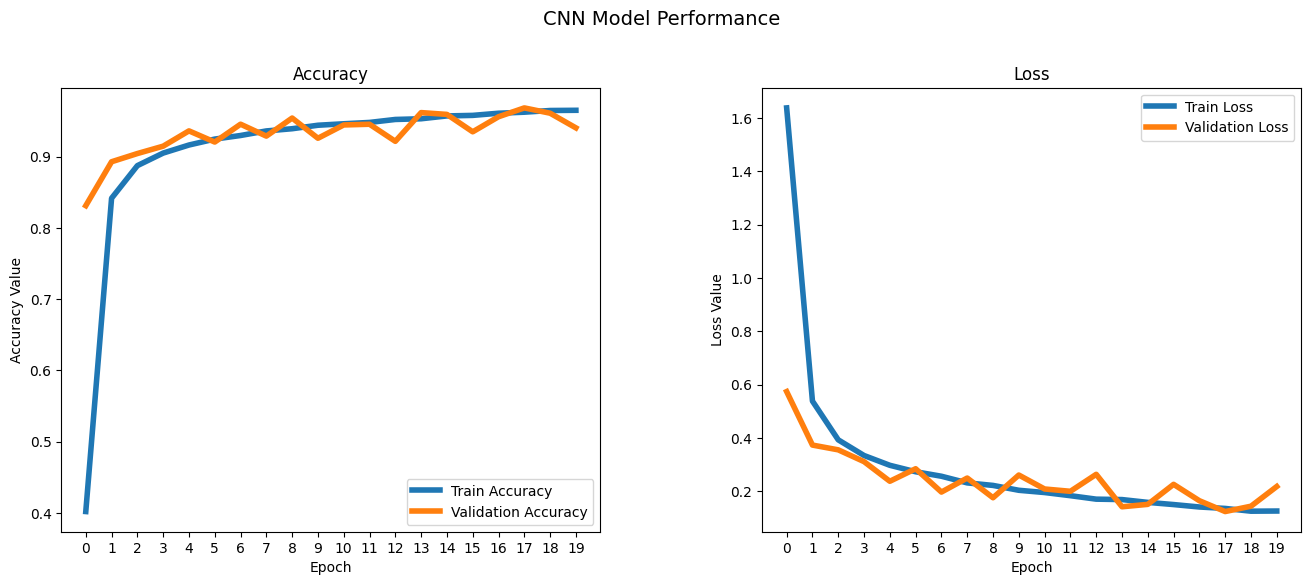

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history2.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history2.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [39]:
model2_scores = model2.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (model2.metrics_names[1], model2_scores[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9228 - loss: 0.3068
TEST SET: compile_metrics: 91.98%


In [40]:
test_predictions2 = model2.predict(x_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


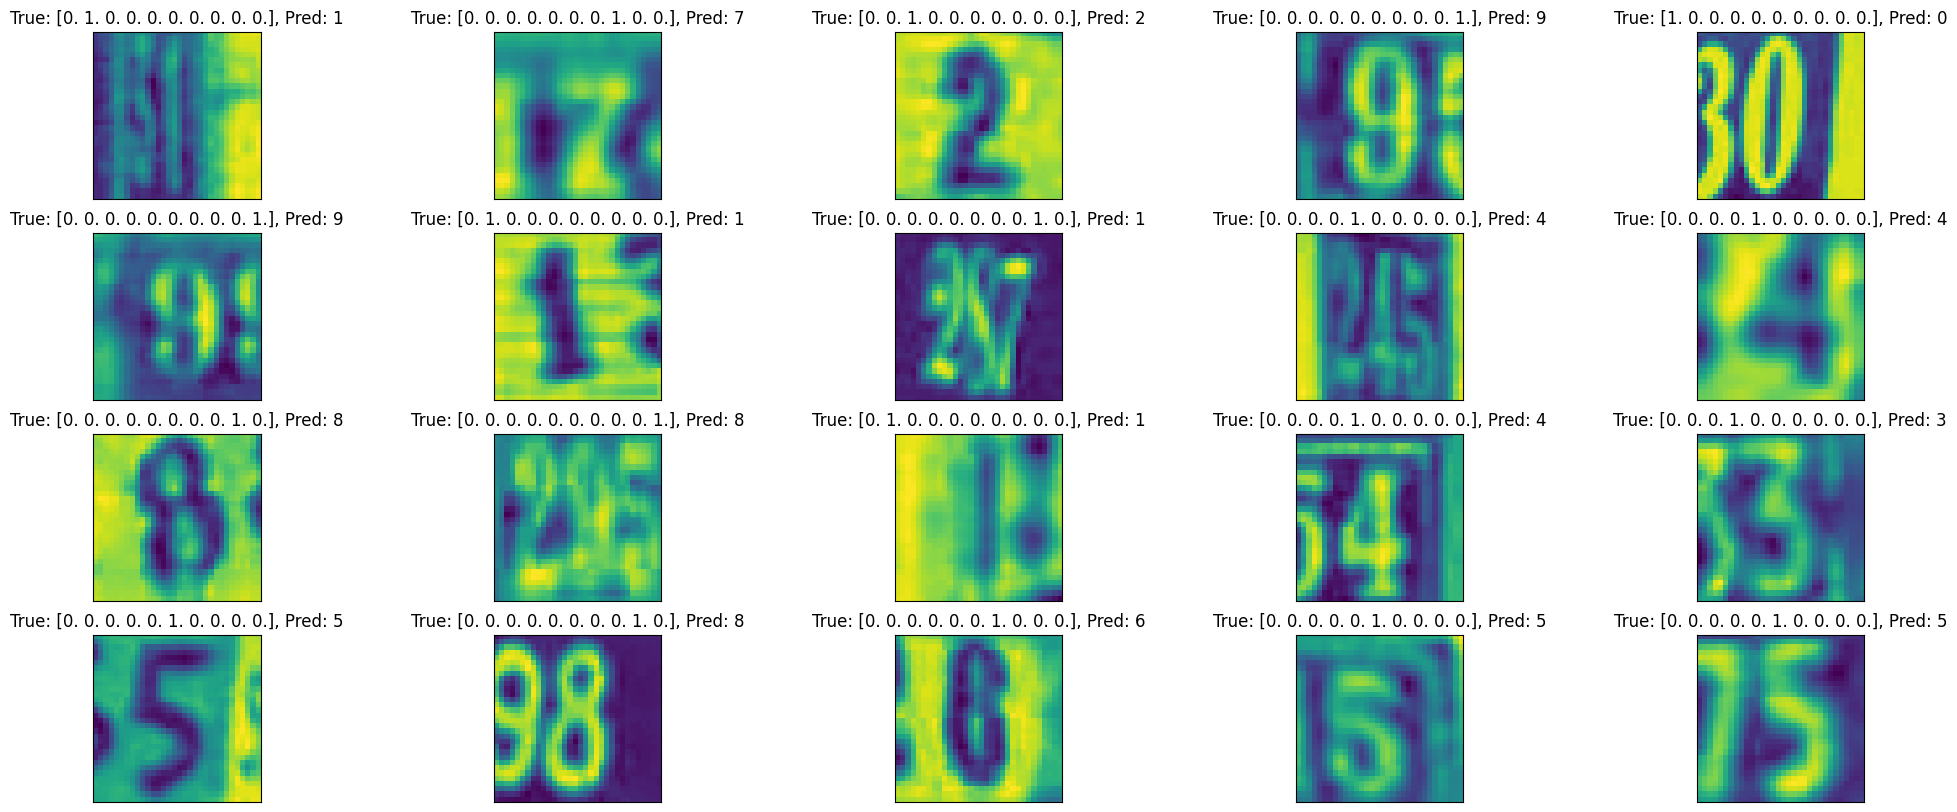

In [41]:
plot_images(x_test, y_test, 4, 5, test_predictions2)

<a id="Best_Model"></a>
# 9. Best Model's Accuracy and loss visualization:

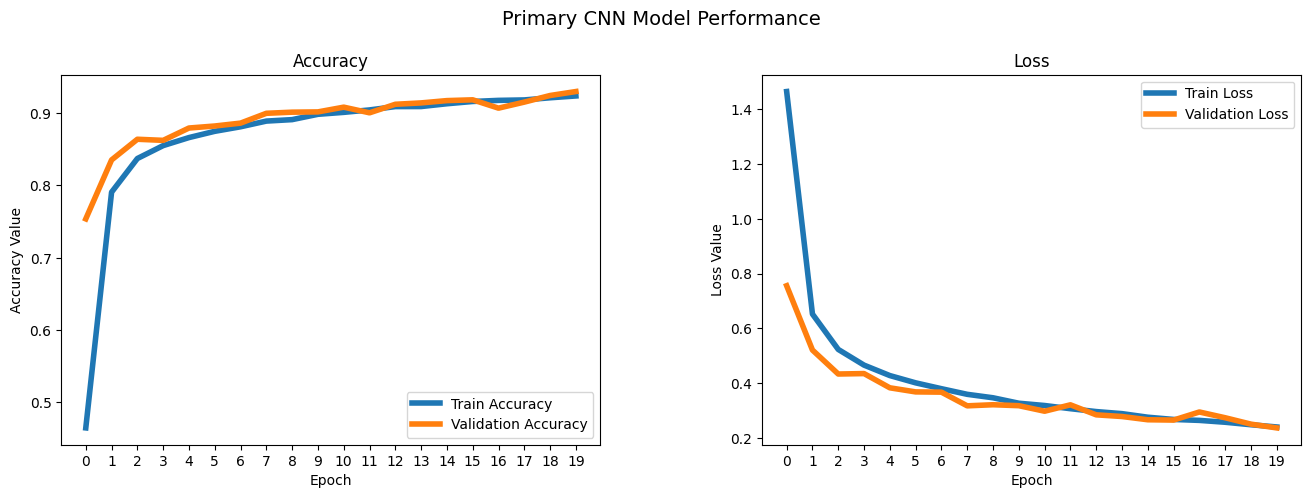

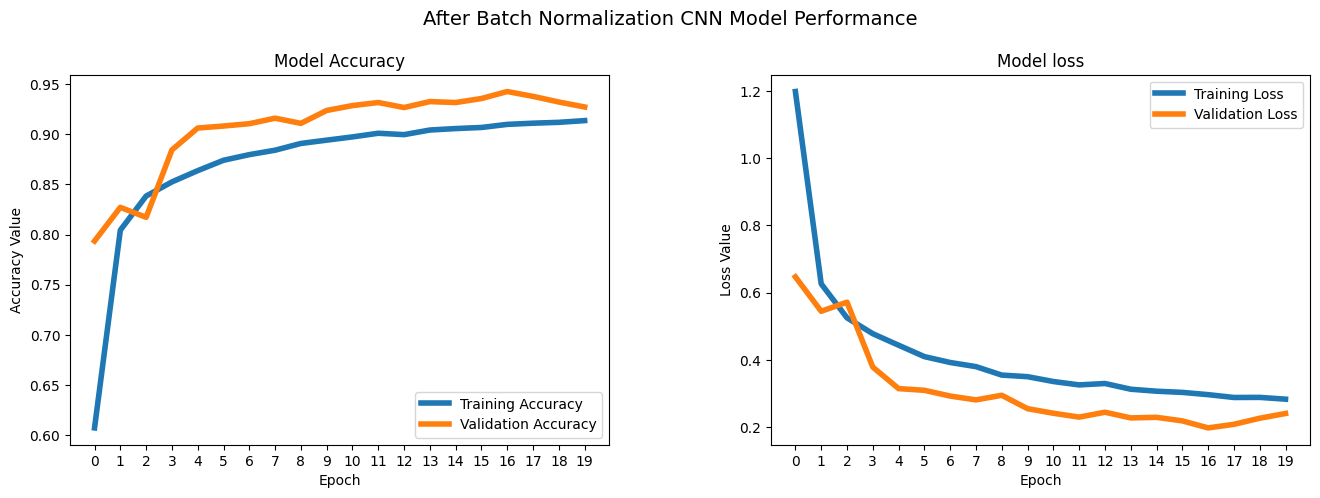

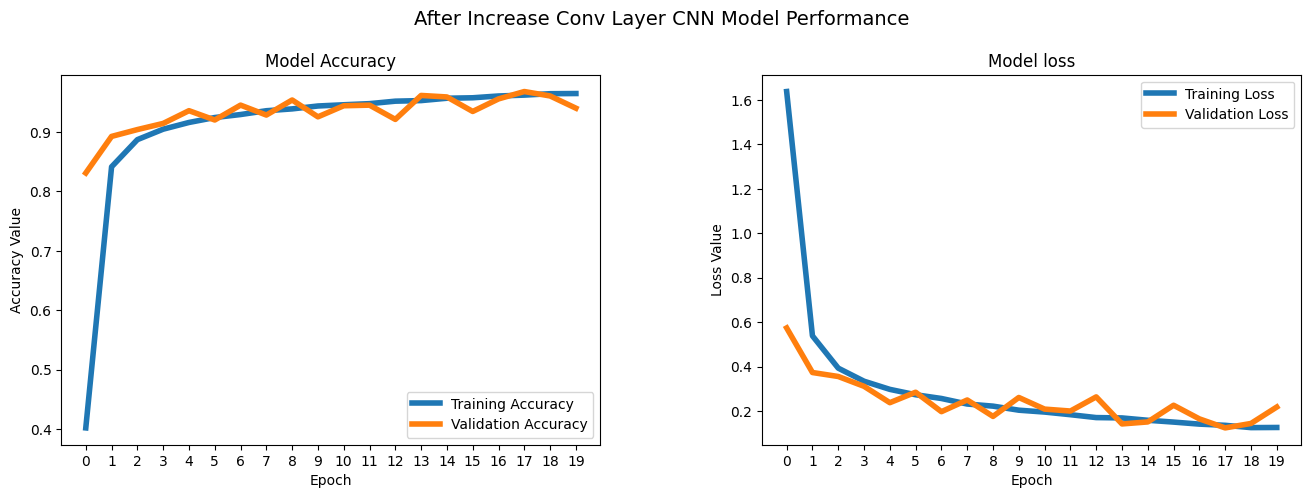

In [42]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 5))
title = fig.suptitle('Primary CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
# Plot the training and validation accuracy

epoch_list = list(range(0,20))
ax1.plot(epoch_list, primary_model_history.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, primary_model_history.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, primary_model_history.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, primary_model_history.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 5))
title = fig.suptitle('After Batch Normalization CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Plot the training and validation accuracy
epoch_list = list(range(0,20))
ax3.plot(epoch_list, history1.history['accuracy'], label='Training Accuracy', linewidth=4)
ax3.plot(epoch_list, history1.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax3.set_xticks(np.arange(0, 20))
ax3.set_ylabel('Accuracy Value')
ax3.set_xlabel('Epoch')
ax3.set_title('Model Accuracy')

l3 = ax3.legend(loc="best")

# Plot the training and validation loss

ax4.plot(epoch_list, history1.history['loss'], label='Training Loss',linewidth=4)
ax4.plot(epoch_list, history1.history['val_loss'], label='Validation Loss',linewidth=4)
ax4.set_xticks(np.arange(0, 20))
ax4.set_ylabel('Loss Value')
ax4.set_xlabel('Epoch')
ax4.set_title('Model loss')
l4 = ax4.legend(loc="best")

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 5))
title = fig.suptitle('After Increase Conv Layer CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax5.plot(epoch_list, history2.history['accuracy'], label='Training Accuracy', linewidth=4)
ax5.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax5.set_xticks(np.arange(0, 20))
ax5.set_ylabel('Accuracy Value')
ax5.set_xlabel('Epoch')
ax5.set_title('Model Accuracy')

l5 = ax5.legend(loc="best")

# Plot the training and validation loss

ax6.plot(epoch_list, history2.history['loss'], label='Training Loss',linewidth=4)
ax6.plot(epoch_list, history2.history['val_loss'], label='Validation Loss',linewidth=4)
ax6.set_xticks(np.arange(0, 20))
ax6.set_ylabel('Loss Value')
ax6.set_xlabel('Epoch')
ax6.set_title('Model loss')
l6 = ax6.legend(loc="best")

In [43]:
model2_Train_score=model2.evaluate(x_train, y_train)
print("TRAIN SET: %s: %.2f%%" % (model2.metrics_names[1], model2_Train_score[1]*100))

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9493 - loss: 0.1742
TRAIN SET: compile_metrics: 94.90%


<a id="Model_Save"></a>
# 10. Model Save, load and Confusion Matrix analysis

In [44]:
model2.save('SVHN_Model_CNN.h5')

In [45]:
SVHN_Model = load_model('/kaggle/working/SVHN_Model_CNN.h5')

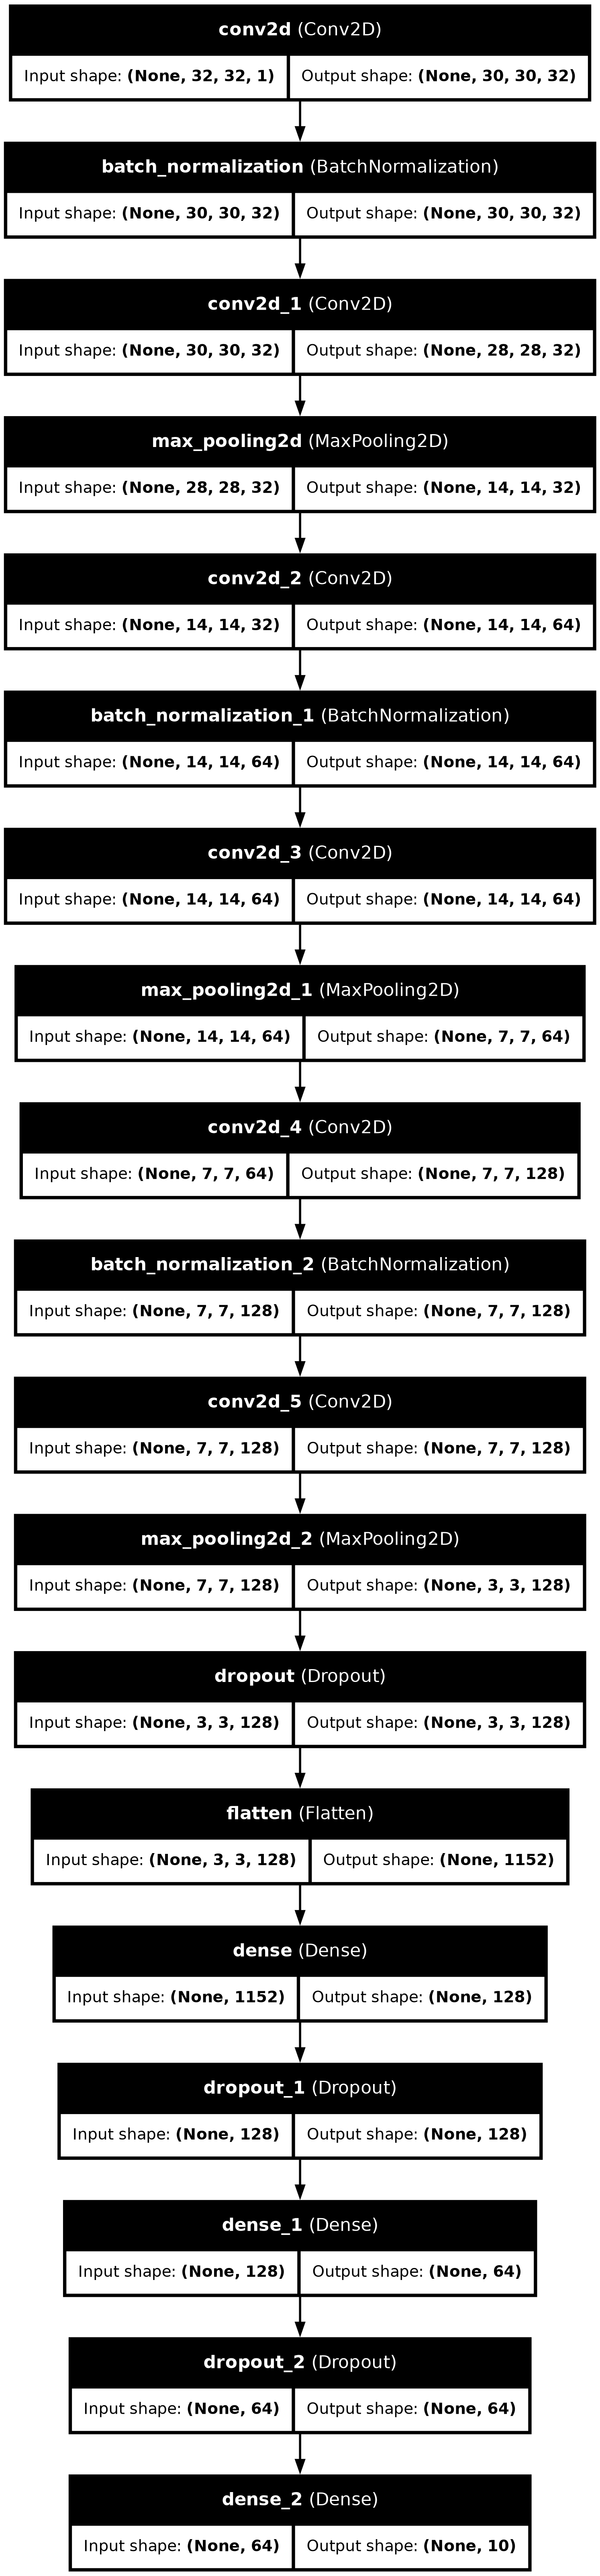

In [46]:
plot_model(SVHN_Model,
          'SVHN_Model_CNN.h5.png',
          show_shapes=True,
          show_layer_names=True)

In [47]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_train, y_train)
print("TRAIN SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9493 - loss: 0.1742
TRAIN SET: compile_metrics: 94.90%


In [48]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9228 - loss: 0.3068
TEST SET: compile_metrics: 91.98%


In [49]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_val, y_val)
print("TEST SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9346 - loss: 0.2421
TEST SET: compile_metrics: 94.03%


In [50]:
# Getting model predictions
SVHN_Model_predictions = SVHN_Model.predict(x_test)
preds = np.argmax(SVHN_Model_predictions, axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [51]:
np.argmax(SVHN_Model_predictions)

39

In [52]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(SVHN_Model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix
[[1743   20    2    3   20    1    9    4    7    5]
 [  27 1688    3    8   54    6   11   18   12    1]
 [  17   16 1625   17   52    6    2   23   25   20]
 [   6   21   10 1543   18   49    9   15   28   20]
 [  21   31    2    9 1725    2    9    0    7    6]
 [   3   10    6   35   14 1652   22    1   16    9]
 [  41   11    3    5   23   32 1667    2   45    3]
 [  22   88    9   17   24    4    1 1633    4    6]
 [  24   15    8   17   16    9   46    4 1664    9]
 [  62   12    9   15   29   19    4    9   28 1617]]


In [53]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1814
           1       0.88      0.92      0.90      1828
           2       0.97      0.90      0.93      1803
           3       0.92      0.90      0.91      1719
           4       0.87      0.95      0.91      1812
           5       0.93      0.93      0.93      1768
           6       0.94      0.91      0.92      1832
           7       0.96      0.90      0.93      1808
           8       0.91      0.92      0.91      1812
           9       0.95      0.90      0.92      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



### Plotting Confusion Matrix

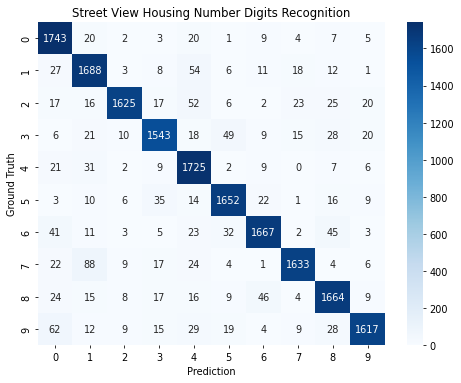

In [54]:
# Defining labels
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# To evaluate the accuracy of the classification
cnf = confusion_matrix(y_test_arg, y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')

# Plotting rectangular data as a color-encoded matrix.
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Street View Housing Number Digits Recognition')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)